In [156]:
import pandas as pd
import numpy as np

from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot


import os
import cx_Oracle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [157]:
"""connection = cx_Oracle.connect('invctrl/mm@SHDATA')"""

"connection = cx_Oracle.connect('invctrl/mm@SHDATA')"

In [158]:
def parser(x):
	return datetime.strptime(x, '%m/%d/%Y')

In [159]:
df = pd.read_csv('data/item_history.csv',header=0, parse_dates=[5], index_col=[5] )
"""df.set_index('PERIOD_START')"""
df["REPLACEMENT_ITEM"].fillna('N', inplace=True)
df["QTY"]= round(df["QTY"]/df["QTY_PER_SELL_UOM"],4)
"""df['PERIOD_START'] = pd.to_datetime(df['PERIOD_START']).apply(lambda x: x.date())"""
df = df.drop(['QTY_PER_SELL_UOM', 'E3_YEAR', 'E3_4WK_PERIOD'], axis=1)


In [160]:
df

,DIST_NO,ITEM_NO,QTY,HITS,REPLACEMENT_ITEM
PERIOD_START,,,,,
2015-12-20,7,1015241,22384.0,7982,Y
2016-01-17,7,1015241,24335.0,8678,Y
2016-02-14,7,1015241,24691.0,8817,Y
2016-03-13,7,1015241,29842.0,10658,Y
2016-04-10,7,1015241,28929.0,10295,Y
2016-05-08,7,1015241,31926.0,11412,Y
2016-06-05,7,1015241,32170.0,11423,Y
2016-07-03,7,1015241,30187.0,10816,N
2016-07-31,7,1015241,33217.0,11825,N


In [161]:
dfs = df.drop(['DIST_NO', 'ITEM_NO', 'HITS', 'REPLACEMENT_ITEM'], axis=1)
dfs



,QTY
PERIOD_START,
2015-12-20,22384.0
2016-01-17,24335.0
2016-02-14,24691.0
2016-03-13,29842.0
2016-04-10,28929.0
2016-05-08,31926.0
2016-06-05,32170.0
2016-07-03,30187.0
2016-07-31,33217.0


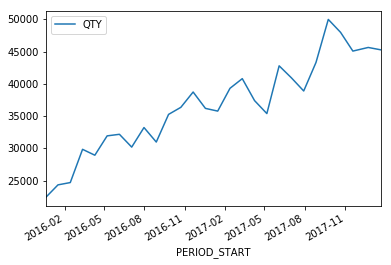

In [162]:
dfs.plot()

pyplot.show()

In [163]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2015-12-20 to 2018-01-21
Data columns (total 1 columns):
QTY    28 non-null float64
dtypes: float64(1)
memory usage: 448.0 bytes


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


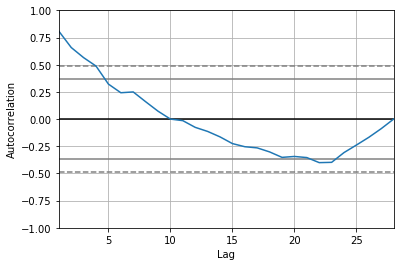

In [164]:
autocorrelation_plot(dfs)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                  D.QTY   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -249.844
Method:                       css-mle   S.D. of innovations           2489.336
Date:                Wed, 14 Feb 2018   AIC                            513.688
Time:                        17:05:07   BIC                            522.759
Sample:                    01-17-2016   HQIC                           516.386
                         - 01-21-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         852.8469    204.742      4.165      0.000     451.560    1254.134
ar.L1.D.QTY    -0.4237      0.209     -2.024      0.056      -0.834      -0.013
ar.L2.D.QTY    -0.5242      0.235     -2.228    

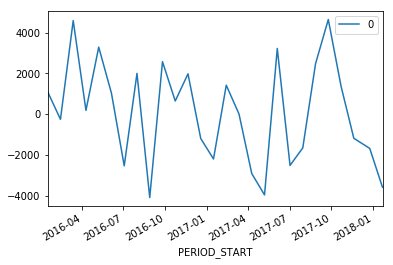

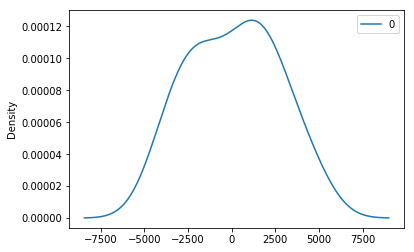

                 0
count    27.000000
mean    106.894202
std    2555.994674
min   -4075.254462
25%   -1929.690090
50%     189.350435
75%    1988.945632
max    4639.652801


In [165]:
model = ARIMA(dfs, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [166]:
X = dfs.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=40174.604378, expected=35380.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.

LinAlgError: SVD did not converge